# This is my first text
## Morsy June 2020


# Importing image (Lables and Scale added)

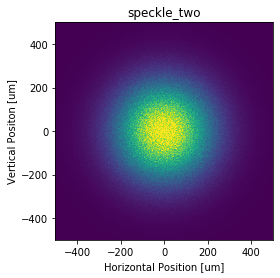

In [1]:
from PIL import Image # PIL for PILLOW is the package that allows for importing images.
import numpy as np
import matplotlib.pyplot as plt

img = Image.open("C:\\Users\\User\\Downloads\\speckle_two.png", "r" )

%matplotlib inline
dx_m = 1*10**-6  #pixel size in meter
Dx_m = 1e-3      #image full size
extent = (-Dx_m/2 * 1e6, +Dx_m/2 * 1e6, -Dx_m/2 * 1e6, +Dx_m/2 * 1e6) 
plt.imshow(img, extent = extent)
plt.xlabel('Horizontal Position [um]')
plt.ylabel('Vertical Positon [um]')
plt.title('speckle_two')
plt.show()

In [2]:
x_m = np.linspace(-Dx_m/2, Dx_m/2, Dx_m/dx_m + 1)
real_axis = x_m
fs = 1/(real_axis[1]-real_axis[0])
Nfft=len(real_axis)
            
df = fs/Nfft
f_cpm = np.linspace(0,(fs-df),Nfft) - (fs-np.mod(Nfft,2)*df)/2


In [3]:
np.shape(np.linspace(0,(fs-df),Nfft))
np.shape(f_cpm)

(1001,)

## Fourier Transform of Image (Labels and Scale added)

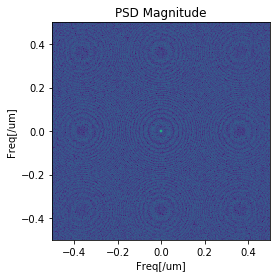

In [4]:
%matplotlib inline
data = np.asarray(img) # Converts the image into a numpy array
Y = np.fft.fftshift(np.fft.fft2(data))  # it rearranges the fourier transform to make it symetrical about zero

df_cpm = f_cpm[1] - f_cpm[0]  #pixel size in meter
Df_cpm = f_cpm[-1] - f_cpm[0]      #image full size
extent = (-Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6, -Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6) 

plt.imshow(np.abs(Y)**0.1, extent = extent)
plt.xlabel('Freq[/um]')
plt.ylabel('Freq[/um]')
plt.title('PSD Magnitude')
plt.show()

## Creating a circle on the Image

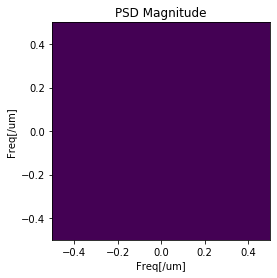

In [5]:
(Fx, Fy) = np.meshgrid(f_cpm, f_cpm)
Z = Fx**2 + Fy**2    # Equation of a circule
r = df_cpm * 100      # Radious of the ring
dr = df_cpm     # Thikness of the ring
#a = np.where(Z >= 10)
#a = np.where(np.abs(Z - 10) < 1) 
a = np.where(np.abs(Z - r**2) < dr**2)   # Creates an array that contained zeros everywhere exept for the radii
A = Z * 0
A[a] = 1


plt.imshow(A, extent = extent)
plt.xlabel('Freq[/um]')
plt.ylabel('Freq[/um]')
plt.title('PSD Magnitude')
plt.show()

## Circle Integral 

In [6]:
temp = np.abs(Y) * A
intg = np.sum(temp)
intg

18765.158606287187

In [ ]:
#N = np.size(f_cpm)/2
N = 500
circ_sum = np.zeros(N)
for i in np.arange(N):
    r = df_cpm * i      # Radious of the ring
    dr = df_cpm     # Thikness of the ring
    #a = np.where(np.abs(Z - r**2) <= dr**2)   # Creates an array that contained zeros everywhere exept for the radii
    a = np.where((Z >= r**2) & (Z < (r + dr)**2))
    A = Z * 0
    A[a] = 1
    
    circ_sum[i] = np.sum(np.abs(Y) * A) / np.sum(A)
    temp = np.sum(np.abs(Y) *A)


## Plotting the Circle Integral

In [ ]:
plt.plot(circ_sum)
plt.ylim((0, 10000))
plt.show()

In [ ]:
temp

### Adjusted Plot of the Integral (Cross-Section)

In [ ]:
%matplotlib inline
(width, height) = data.shape
data_cross_x = np.abs(Y[:, int(np.floor(height/2))])
plt.plot(data_cross_x)
plt.title('PSD Cross section')
plt.ylim((0, .1e6))
plt.show()

# Circular Integration:

## 1. Create rings.